# <p style="text-align:center;">**AIRBNB LISTINGS BANGKOK ANALYSIS**</p>
### <p style="text-align:center;">**Capstone Modul 2**</p>
---

# **LATAR BELAKANG**

Airbnb merupakan platform online untuk orang menyediakan atau menyewa tempat tinggal sementara. Melalui website atau aplikasi airbnb, pengguna dapat menemukan berbagai jenis properti yang tersedia untuk di sewa, seperti apartemen, kamar pribadi, hotel, dan sebagainya. Airbnb kini tersedia di berbagai kota, salah satunya adalah Bangkok. Diketahui bahwa Bangkok merupakan ibukota Thailand yang menjadi pusat ekonomi, politik, dan budaya. Hal ini menjadikan banyaknya wisatawan yang datang untuk menjelajahi kota ini. Wisatawan yang datang ke bangkok dapat mempermudah akomodasi dengan mencari tempat penginapan melalui airbnb. Dataset ini meliputi informasi properti yang didaftarkan melalui airbnb di kota Bangkok. Informasi yang diberikan seperti nama properti, lokasi, tipe kamar, profile pemilik, harga dan sebagainya.

# **RUMUSAN DAN TUJUAN MASALAH**

Airbnb ingin melakukan analisis terhadap bisnisnya di Bangkok, dan bagaimana karakteristik dari setiap listing. Informasi ini akan membantu perusahaan dalam memperluas bisnisnya kedepan agar tepat sasaran dan lebih optimal.

Peran sebagai data analyst yaitu mengidentifikasi bagaimana karakteristik properti di kota Bangkok. Dari permasalahan diatas, maka rumusan masalah tersebut sebagai berikut :
1. Menganalisis Jumlah listing di setiap kota
2. Menganalisis Jumlah tipe kamar di setiap kota
3. Menganalisis Harga sewa di setiap kota

# **LOAD DATA**

Dataset ini dapat diakses melalui link https://drive.google.com/drive/folders/1A_KBMRFTS5Mthpp46nulso679ML4ZwTF

In [52]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
airbnb = pd.read_csv('Airbnb Listings Bangkok.csv')
airbnb.head()

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.75983,100.54134,Entire home/apt,1905,3,65,2020-01-06,0.50,2,353,0
1,1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.66818,100.61674,Private room,1316,1,0,NaN,NaN,2,358,0
2,2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.75232,100.62402,Private room,800,60,0,NaN,NaN,1,365,0
3,3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.78823,100.57256,Private room,1286,7,2,2022-04-01,0.03,1,323,1
4,4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.76872,100.63338,Private room,1905,1,0,NaN,NaN,3,365,0


- Terdapat 15854 baris dan 17 columns di dataset airbnb listing bangkok
- akan dilakukan drop pada kolom Unnamed karena hanya perulangan pada index saja

In [3]:
airbnb.drop('Unnamed: 0',axis=1,inplace=True)

# **DESKRIPSI FITUR**
1. `id` : Identitas unik Airbnb untuk tempat tersebut.
2. `name` : Nama yang dari properti
3. `host_id` : Pengidentifikasi unik Airbnb untuk tuan rumah/pengguna.
4. `host_name` : Nama tuan rumah
5. `neighbourhood` : mengenai lingkungan (neighborhood) di mana properti tersebut terletak.
6. `latitude` : Menggunakan proyeksi Sistem Geodesi Dunia (WGS84) untuk lintang dan bujur.
7. `longitude` : Menggunakan proyeksi Sistem Geodesi Dunia (WGS84) untuk lintang dan bujur.
8. `room_type` : tipe kamar yang disediakan
9. `price` : Harga harian untuk menyewa properti, dinyatakan dalam mata uang lokal. ($)
10. `minimum_nights` :  Jumlah minimum malam yang harus diinap oleh penyewa untuk properti tersebut.
11. `number_of_reviews` : Jumlah ulasan yang diterima oleh properti tersebut
12. `last_review`	: tanggal terakhir review
13. `calculated_host_listings_count` : jumlah properti yang dimiliki oleh tuan rumah pada saat pengambilan data terbaru di suatu kota atau wilayah geografis.
14. `availability_365` : Ketersediaan properti selama 365 hari. Ini menunjukkan berapa banyak hari properti tersebut tersedia untuk disewa dalam satu tahun. 
15. `number_of_reviews_ltm` : Jumlah ulasan yang diterima oleh properti dalam 12 bulan terakhir (dalam 12 bulan terakhir).

# **DATA UNDERSTANDING**

In [4]:
# cek info
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15854 entries, 0 to 15853
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              15854 non-null  int64  
 1   name                            15846 non-null  object 
 2   host_id                         15854 non-null  int64  
 3   host_name                       15853 non-null  object 
 4   neighbourhood                   15854 non-null  object 
 5   latitude                        15854 non-null  float64
 6   longitude                       15854 non-null  float64
 7   room_type                       15854 non-null  object 
 8   price                           15854 non-null  int64  
 9   minimum_nights                  15854 non-null  int64  
 10  number_of_reviews               15854 non-null  int64  
 11  last_review                     10064 non-null  object 
 12  reviews_per_month               

In [5]:
# cek duplikat data airbnb
airbnb[airbnb.duplicated()]

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm


In [6]:
# sample unique value dari setiap kolom
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)
pd.set_option('display.max_colwidth',None)

def unique_data(airbnb):
    data_unique = pd.DataFrame()
    data_unique['Columns'] = airbnb.columns
    data_unique['Unique Count'] = [airbnb[col].nunique() for col in (airbnb.columns)]
    data_unique['Unique'] = [airbnb[col].unique()[:5] for col in (airbnb.columns)]  
    return data_unique


unique_data(airbnb)

,Columns,Unique Count,Unique
0,id,15854,"[27934, 27979, 28745, 35780, 941865]"
1,name,14794,"[Nice room with superb city view, Easy going landlord,easy place, modern-style apartment in Bangkok, Spacious one bedroom at The Kris Condo Bldg. 3, Suite Room 3 at MetroPoint]"
2,host_id,6659,"[120437, 120541, 123784, 153730, 610315]"
3,host_name,5312,"[Nuttee, Emy, Familyroom, Sirilak, Kasem]"
4,neighbourhood,50,"[Ratchathewi, Bang Na, Bang Kapi, Din Daeng, Bang Kho laen]"
5,latitude,9606,"[13.75983, 13.66818, 13.75232, 13.78823, 13.76872]"
6,longitude,10224,"[100.54134, 100.61674, 100.62402, 100.57256, 100.63338]"
7,room_type,4,"[Entire home/apt, Private room, Hotel room, Shared room]"
8,price,3040,"[1905, 1316, 800, 1286, 1000]"
9,minimum_nights,86,"[3, 1, 60, 7, 250]"


### **Insight**
Dapat disimpulkan bahwa : 
- Dataset ini memiliki 15854 baris dan 16 kolom
- Berdasarkan informasi yang diberikan, data type dari semua kolom sudah cukup sesuai tetapi pada kolom `last_review` tipe datanya berupa object padahal di dataset nya berupa tanggal seharusnya tipe data dari kolom `last_review` adalah datetime.
- Memiliki missing value pada beberapa kolom yaitu `name`,`host_name`,`last_review`, dan `reviews_per_month`
- Tidak terdapat data yang duplikat 

# **MISSING VALUE**

In [7]:
missing_data = pd.DataFrame({
    'Missing Count': airbnb.isna().sum(),
    'Percentage Missing': (airbnb.isna().sum() / len(airbnb)) * 100})
missing_data

,Missing Count,Percentage Missing
id,0,0.000000
name,8,0.050460
host_id,0,0.000000
host_name,1,0.006308
neighbourhood,0,0.000000
latitude,0,0.000000
longitude,0,0.000000
room_type,0,0.000000
price,0,0.000000
minimum_nights,0,0.000000


<Axes: >

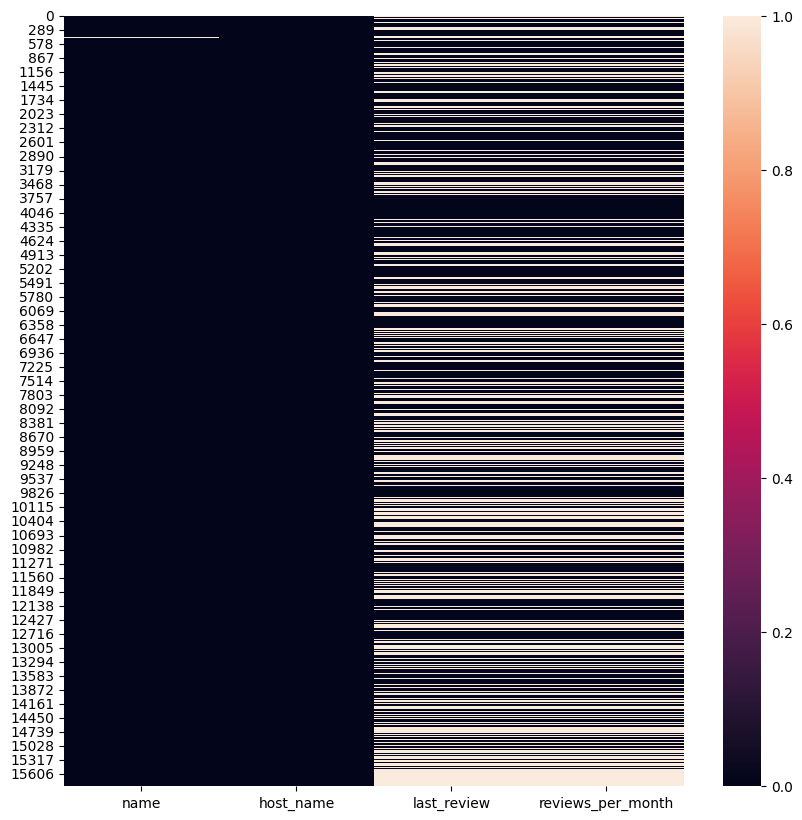

In [8]:
# cek sebaran data missing value
plt.figure(figsize=(10,10))
sns.heatmap(airbnb[['name','host_name','last_review','reviews_per_month']].isna())

### **Insight**
Berdasarkan grafik dan informasi diatas bahwa :
- pada kolom `name` terdapat missing value pada 1 baris 
- pada kolom `host_name` terdapat missing value pada 8 baris jika di persentase terdapat <0.06% dari data
- sedangkan pada kolom `last_review` dan `reviews_per_month` terdapat hubungan pada kedua kolom ini yaitu jika kolom `last_review` terdapat missing value makan kolom `reviews_per_month` juga hilang.

### **Asumsi**
untuk mengatasi missing value tersebut dapat dilakukan sebagai berikut:
- untuk kolom yang memiliki missing value < 0.5% maka akan dilakukan drop pada baris 
- untuk kolom yang memiliki missing value > 0.5% maka akan diisi dengan nilai atau akan dilakukan drop pada kolom tersebut

# **HANDLING MISSING VALUE**

In [9]:
# drop baris pada kolom name dan host_name
airbnb.dropna(subset=['name','host_name'],inplace=True)

In [10]:
# dilakukan pengisian nilai 0 pada kolom reviews_per_month
airbnb['reviews_per_month'].fillna(0, inplace=True)

In [11]:
# akan dilakukan drop pada kolom last_review
airbnb.drop('last_review',axis=1,inplace=True)

In [12]:
airbnb.isna().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
dtype: int64

### **Kesimpulan**
Missing value tersebut diatasi dengan beberapa cara yaitu :
- Dilakukan drop baris pada kolom `name` dan `host_name` yang memiliki missing value
- Dilakukan pengisian nilai 0 pada kolom `reviews_per_month` yang memiliki missing value
- Dilakukan drop pada keseluruhan kolom `last_review`, hal ini dilakukan karena tidak akan digunakan pada analisis nantinya

Kemudian setelah di cek kembali secara keseluruhan, sudah tidak terdapat missing value pada dataset ini, dan data berkurang 9 baris menjadi 15845 baris dan 15 kolom

# **OUTLIERS**

Text(0, 0.5, 'Harga')

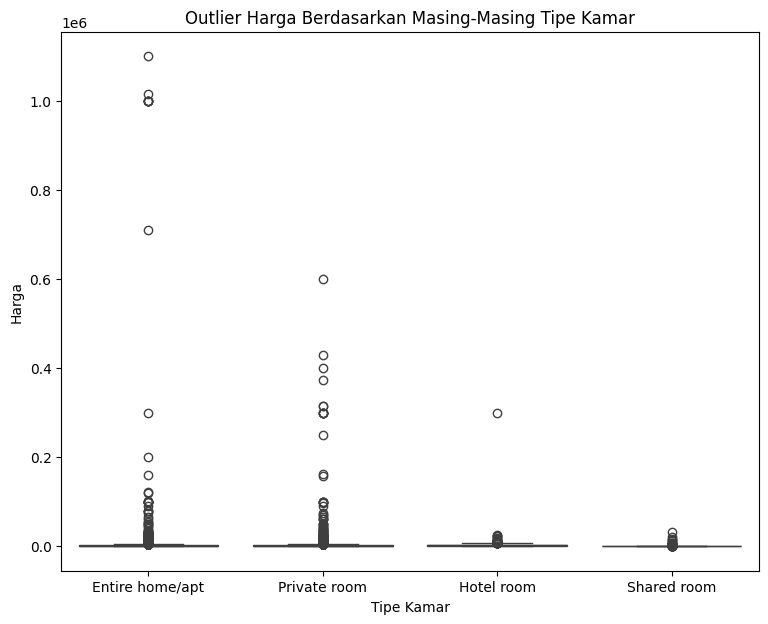

In [13]:
# akan dicek antara tipe kamar dengan harga
plt.figure(figsize=(9,7))
sns.boxplot(x='room_type',y='price',data=airbnb)
plt.title('Outlier Harga Berdasarkan Masing-Masing Tipe Kamar')
plt.xlabel('Tipe Kamar')
plt.ylabel('Harga')

In [14]:
# cek harga di tipe kamar entire home/apt
price_entire_home = airbnb[airbnb['room_type']=='Entire home/apt'][['price']].sort_values(by='price',ascending=False)
display(price_entire_home.head())
display(price_entire_home.tail())

,price
12868,1100000
12300,1014758
6289,1000000
1779,1000000
4620,1000000


,price
11215,348
9657,346
1481,346
5246,337
10222,332


In [15]:
# cek harga di tipe kamar private 
price_private_room = airbnb[airbnb['room_type']=='Private room'][['price']].sort_values(by='price',ascending=False)
display(price_private_room.head())
display(price_private_room.tail())

,price
4373,600700
11885,429443
12792,400717
6549,372227
6760,314899


,price
11663,315
7831,310
8974,304
9529,300
15551,278


In [16]:
# cek harga di tipe kamar hotel
price_hotel_room = airbnb[airbnb['room_type']=='Hotel room'][['price']].sort_values(by='price',ascending=False)
display(price_hotel_room.head())
display(price_hotel_room.tail())

,price
2668,300000
3415,24390
6281,23671
6283,23629
6282,23029


,price
8445,326
8983,318
2748,318
2770,318
11103,0


In [17]:
# cek harga di tipe kamar shared room
price_hotel_room = airbnb[airbnb['room_type']=='Shared room'][['price']].sort_values(by='price',ascending=False)
display(price_hotel_room.head())
display(price_hotel_room.tail())

,price
7857,31200
6868,20895
2430,17316
5577,13852
5079,13000


,price
9636,303
15473,295
15456,280
15401,280
15455,280


Dapat disimpulkan bahwa : 
- outlier yang terjadi pada semua tipe kamar bisa saja terjadi karena listing dapat memberikan harga yang tinggi untuk properti yang disewakan.
- terdapat anomali pada harga di tipe kamar hotel room, yaitu terdapat harga 0 dan itu tidak mungkin untuk suatu properti di sewakan dengan harga nol. Maka anomali tersebut akan di drop

In [18]:
# drop kolom tipe hotel room yang memiliki harga 0
airbnb.drop(airbnb[(airbnb['room_type'] == 'hotel room') & (airbnb['price'] == 0)].index, inplace=True)

# **MEMBUAT KATEGORI BERDASRAKAN DISTRICT**

Berdasarkan informasi [source](https://www.mdpi.com/sustainability/sustainability-13-11426/article_deploy/html/images/sustainability-13-11426-g001.png), District yang ada di Kota Bangkok dapat dibagi menjadi 3 bagian yaitu inner zone, middle zone dan outer zone. Dengan memberikan kategori tersebut akan mempermudah dalam melakukan analisis nantinya. 

In [19]:
airbnb['neighbourhood'].unique()

array(['Ratchathewi', 'Bang Na', 'Bang Kapi', 'Din Daeng',
       'Bang Kho laen', 'Rat Burana', 'Chatu Chak', 'Khlong San',
       'Bang Rak', 'Phaya Thai', 'Sathon', 'Khlong Toei', 'Vadhana',
       'Sai Mai', 'Lat Krabang', 'Bangkok Yai', 'Wang Thong Lang',
       'Huai Khwang', 'Phasi Charoen', 'Bang Sue', 'Nong Chok',
       'Phra Khanong', 'Thawi Watthana', 'Parthum Wan', 'Pra Wet',
       'Phra Nakhon', 'Thon buri', 'Yan na wa', 'Suanluang', 'Don Mueang',
       'Dusit', 'Lak Si', 'Samphanthawong', 'Bueng Kum', 'Bang Phlat',
       'Saphan Sung', 'Min Buri', 'Khan Na Yao', 'Khlong Sam Wa',
       'Bang Khen', 'Lat Phrao', 'Chom Thong', 'Bangkok Noi',
       'Pom Prap Sattru Phai', 'Nong Khaem', 'Thung khru', 'Bang Khae',
       'Bang Khun thain', 'Taling Chan', 'Bang Bon'], dtype=object)

In [20]:
def label(neighbourhood):
    if neighbourhood in ['Chatu Chak','Bang Sue','Dusit','Bang Rak','Bangkok Noi','Bangkok Yai','Khlong Toei','Ratchathewi','Parthum Wan','Pom Prap Sattru Phai','Phra Nakhon','Phaya Thai','Huai Khwang','Din Daeng','Sathon','Khlong San','Thon buri','Bang Kho laen','Yan na wa','Samphanthawong','Vadhana']:
        return 'Inner City'
    elif neighbourhood in['Sai Mai','Bang Kapi','Lat Phrao','Bang Khen','Bueng Kum','Chom Thong','Bang Na','Pra Wet','Suanluang','Saphan Sung','Khan Na Yao','Wang Thong Lang','Thung khru','Bang Khae','Bang Phlat','Phra Khanong','Rat Burana','Phasi Charoen']:
        return 'Middle City'
    elif neighbourhood in['Nong Chok','Lat Krabang','Min Buri','Khlong Sam Wa','Taling Chan','Lak Si','Don Mueang','Bang Khun thain','Bang Bon','Nong Khaem','Thawi Watthana']:
        return 'Outer City'
    else :
        return 'Tidak Tahu'

airbnb['Label City'] = airbnb['neighbourhood'].apply(label)

In [21]:
airbnb.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,Label City
0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.75983,100.54134,Entire home/apt,1905,3,65,0.50,2,353,0,Inner City
1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.66818,100.61674,Private room,1316,1,0,0.00,2,358,0,Middle City
2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.75232,100.62402,Private room,800,60,0,0.00,1,365,0,Middle City
3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.78823,100.57256,Private room,1286,7,2,0.03,1,323,1,Inner City
4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.76872,100.63338,Private room,1905,1,0,0.00,3,365,0,Middle City


In [22]:
# download file cleaning
airbnb.to_csv('airbnbcleaned.csv')

# **ANALISIS**

### **1. Analisis Jumlah Listing Berdasarkan District**

Analisis Jumlah listing berdasarkan district yang ada di Bangkok, akan memberikan informasi district mana saja yang dapat memberikan peluang besar bagi para calon listing yang akan mendaftarkan diri di airbnb berdasarkan karakteristik dari daerah tersebut

Pertanyaan :
1. Bagaimana persebaran listing dari masing-masing zona di Bangkok?
2. Bagaimana karakteristik dari masing-masing kota tersebut?

In [26]:
# jumlah listing berdasarkan zona
listing = airbnb['Label City'].value_counts()
listing

Label City
Inner City     12307
Middle City     2891
Outer City       647
Name: count, dtype: int64

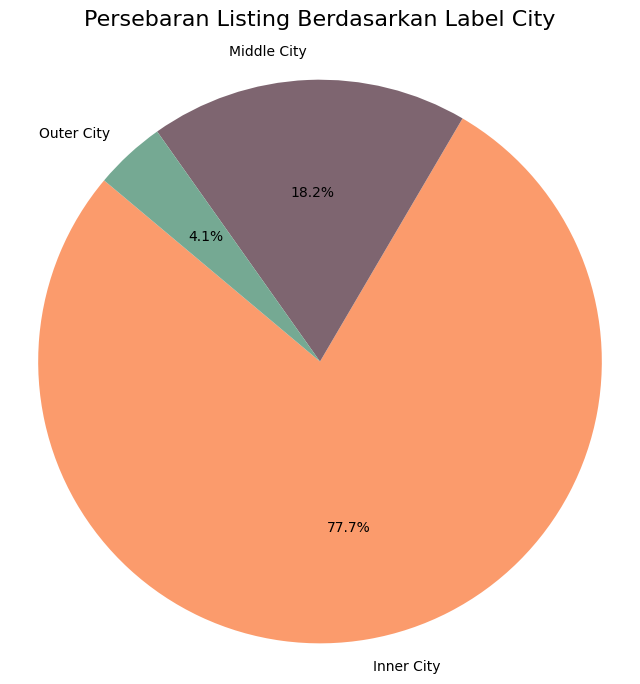

In [27]:
# visualisasi
color = ['#fb9b6c','#7e6570','#75a993']
plt.figure(figsize=(8,8))
plt.title('Persebaran Listing Berdasarkan Label City',pad= 20,size=16)
plt.pie(listing, labels=listing.index, autopct='%1.1f%%', startangle=140,colors=color)
plt.axis('equal')
plt.show()

In [28]:
# groupby listing berdasarkan district
district = airbnb.groupby(['neighbourhood','Label City'])[['name']].count().sort_values(by='name',ascending=False).reset_index()

# top
top_5 = district.head()
display(top_5)
bottom_5 = district.tail()
display(bottom_5)

#bottom
bottom_5_by_city = district.groupby('Label City').tail()
display(bottom_5_by_city)

,neighbourhood,Label City,name
0,Vadhana,Inner City,2151
1,Khlong Toei,Inner City,2096
2,Huai Khwang,Inner City,1125
3,Ratchathewi,Inner City,1113
4,Bang Rak,Inner City,827


,neighbourhood,Label City,name
45,Bang Khun thain,Outer City,21
46,Nong Chok,Outer City,14
47,Thawi Watthana,Outer City,12
48,Nong Khaem,Outer City,9
49,Bang Bon,Outer City,5


,neighbourhood,Label City,name
25,Bang Kho laen,Inner City,140
27,Pom Prap Sattru Phai,Inner City,123
29,Samphanthawong,Inner City,114
32,Dusit,Inner City,91
33,Bangkok Yai,Inner City,90
38,Bueng Kum,Middle City,54
39,Rat Burana,Middle City,53
41,Saphan Sung,Middle City,45
42,Sai Mai,Middle City,40
44,Thung khru,Middle City,23


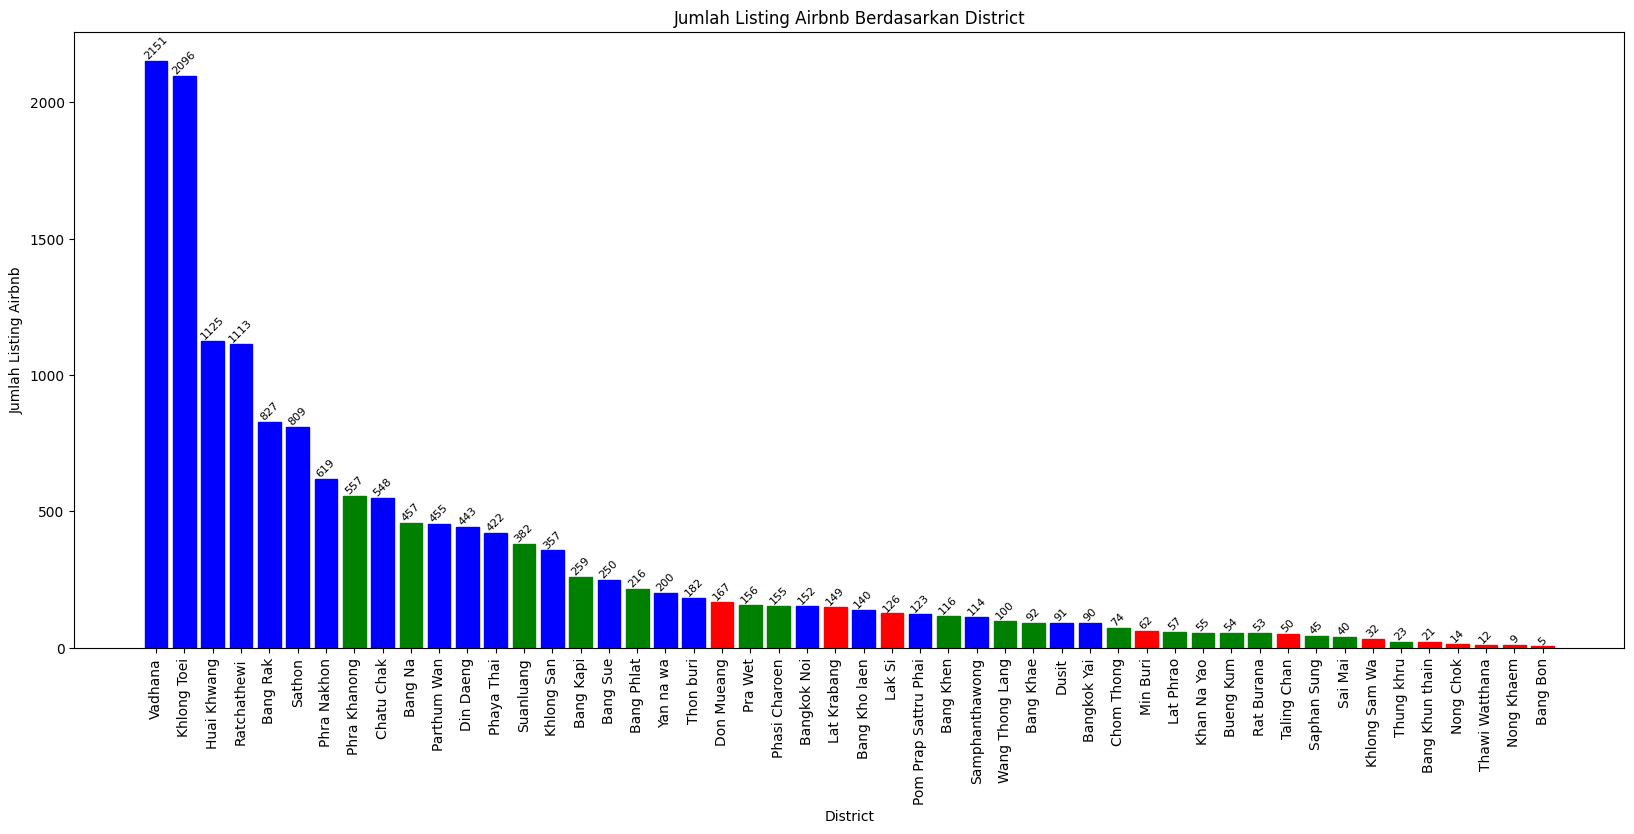

In [31]:
# visualisasi
plt.figure(figsize=(20, 8))
bars = plt.bar(district['neighbourhood'], district['name'])  # Warna default

# Memberikan warna berbeda untuk setiap Label City
label_city_colors = {'Inner City': 'blue', 'Middle City': 'green', 'Outer City': 'red'}
for bar, label_city in zip(bars, district['Label City']):
    bar.set_color(label_city_colors.get(label_city, 'gray'))

# Menambahkan label angka di atas setiap bar
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.1, str(int(bar.get_height())),
             ha='center', va='bottom', rotation=45, color='black', fontsize=8)

#label
plt.xlabel('District')
plt.ylabel('Jumlah Listing Airbnb')
plt.title('Jumlah Listing Airbnb Berdasarkan District')
plt.xticks(rotation=90)  # Memutar label sumbu x agar lebih mudah dibaca

# Menampilkan grafik
plt.show()

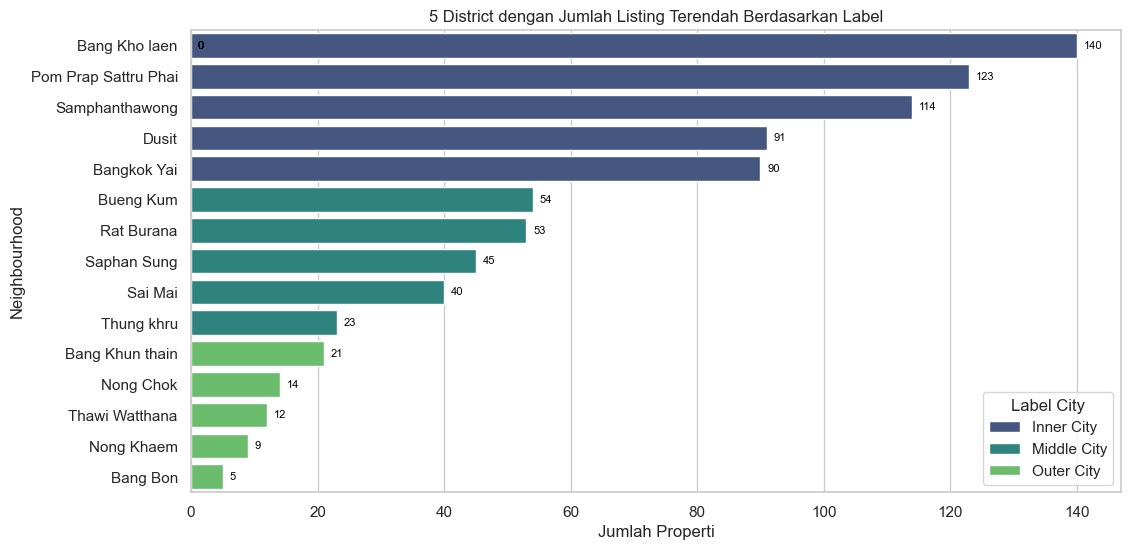

In [27]:
sns.set(style="whitegrid")

# Membuat bar chart
plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(x='name', y='neighbourhood', hue='Label City', data=bottom_5_by_city, palette='viridis')

# Menambahkan label dan judul
plt.xlabel('Jumlah Properti')
plt.ylabel('Neighbourhood')
plt.title('5 District dengan Jumlah Listing Terendah Berdasarkan Label')

# Menampilkan legend
plt.legend(title='Label City')

# Menambahkan nilai di dalam bar
for p in bar_plot.patches:
    bar_plot.annotate(f'{p.get_width():.0f}', (p.get_width(), p.get_y() + p.get_height() / 2),
                      ha='left', va='center', fontsize=8, color='black', xytext=(5, 0),
                      textcoords='offset points')

# Menampilkan plot
plt.show()

**INSIGHT**

Berdasarkan visualisasi diatas didapatkan beberapa insight didalamnya yaitu :
- Proporsi listing berdasarkan zona didapatkan 78% listing terbanyak terdapat di Inner City
- Jumlah listing tertinggi didapatkan zona city inner city yaitu district Vandhana, Khlong Toei, Huai Khwang, Ratchathewi, dan Bang Rak. Sedangkan jumlah listing terendah didapatkan oleh zona Outer city yaitu district Bang Khun Thain, Nong Chock, Thawi Watthana, Nong Khaem, dan Bang Bon.
- Karakteristik dari setiap label city yaitu :
    - **Inner City**
    
        Inner city terletak di pusat kota atau di sekitar pusat kota, sering kali menjadi jantung kota dengan sejarah panjang, ditandai oleh kepadatan penduduk tinggi, bangunan bersejarah, dan keberagaman kehidupan budaya. 

    
    - **Middle City**

        Middle City terletak diantara inner city dan outer city. Beberapa middle city mencakup wilayah yang subur hingga kawasan komersial yang berkembang. Middle city menampilkan variasi perumahan, pusat-pusat perbelanjaan yang ramai, dan kehidupan ekonomi yang dinamis. Ini adalah wilayah yang berada di tengah-tengah, menyajikan campuran karakteristik dari kota bagian dalam dan bagian luar.
    
    - **Outer City**
    
        Outer city, terletak di pinggiran kota atau lebih jauh dari pusat kota, sering kali menawarkan perumahan subur dengan rumah-rumah pribadi dan ruang terbuka yang luas. Pengembangan kota yang lebih baru dengan infrastruktur modern, pusat industri, dan pusat perbelanjaan besar dapat ditemukan di outer city. Lingkungan yang lebih tenang dan kualitas hidup yang lebih tinggi sering menjadi ciri khas wilayah ini.
- Dapat dilihat, dari persebaran di setiap zona Bangkok belum tersebar secara baik, di zona Inner city masih terdapat persebarannya dibawah 150 properti, kemudian di zona middle city masih terdapat persebarannya dibawah 60 properti, sedangkan zona outer city masih terdapat dibawah 10 properti tetapi hal ini sejalan dengan karakteristik dari zona ini yaitu zona yang jauh dari pusat kota.

**KESIMPULAN**

Airbnb memiliki 78% listing terdapat di zona Inner City, dimana zona ini merupakan pusat kota Bangkok yang memiliki berbagai macam tempat hiburan sehingga menjadi daya tarik bagi para wisatawan seperti pusat perbelanjaan, kuliner, terminal bus terbesar di kota bangkok dan sebagainya. Selain itu, di district ini memiliki transportasi umum yang mudah dijangkau oleh para wisatawan, seperti taksi, bus, MRT, kendaraan pribadi dan sebagainya. Sedangkan, listing terendah terjadi di zona Outer city yaitu zona yang cukup jauh dari pusat kota, Zona ini memberikan suasana ketenangan yang tidak didapatkan di pusat kota dan memiliki ruang terbuka yang luas. Zona ini cukup sulit dijangkau oleh kendaraan umum, biasanya hanya terdapat bus umum yang tidak menjangkau semua district dan mobil pribadi. Dari segi persebaran berdasarkan district nya, zona Inner dan middle city belum tersebar dengan baik karena masih terdapat district yang memiliki jumlah properti sedikit dibandingkan district lainnya, padahal ini merupakan zona yang memiliki peluang besar untuk mengembangkan bisnis.

### **2. Analisis Tipe Kamar**

Analisis tipe kamar berdasarkan district akan memberikan informasi kepada host untuk menyesuaikan penawaran dengan kebutuhan dan preferensi di setiap district.

pertanyaan : 

1. Tipe kamar seperti apa yang paling banyak disewakan ?
2. Bagaimana karakteristik dari setiap kamar tersebut?

In [28]:
# jumlah masing-masng tipe kamar
room_type_counts = airbnb['room_type'].value_counts()
room_type_counts

room_type
Entire home/apt    8911
Private room       5762
Hotel room          649
Shared room         523
Name: count, dtype: int64

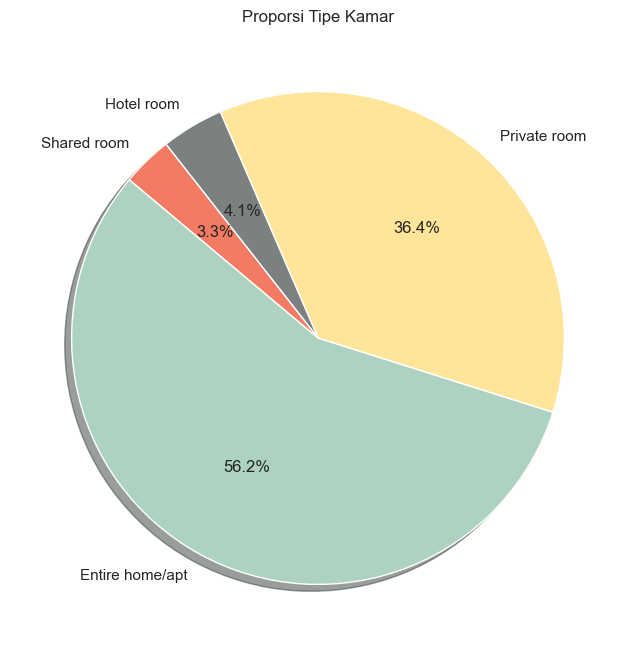

In [29]:
# visualisasi data
colors = ['#add2c2', '#ffe599', '#7a8180', '#f47b63']
plt.figure(figsize=(8,8))
plt.title('Proporsi Tipe Kamar')
plt.pie(room_type_counts, labels=room_type_counts.index, autopct='%1.1f%%', startangle=140,shadow=True,colors=colors)
plt.show()

In [30]:
# Jumlah masing-masing tipe kamar berdasarkan zona Bangkok
type = airbnb.groupby('Label City')['room_type'].value_counts().reset_index(name='count')
type

,Label City,room_type,count
0,Inner City,Entire home/apt,7169
1,Inner City,Private room,4106
2,Inner City,Hotel room,584
3,Inner City,Shared room,448
4,Middle City,Entire home/apt,1542
5,Middle City,Private room,1266
6,Middle City,Shared room,47
7,Middle City,Hotel room,36
8,Outer City,Private room,390
9,Outer City,Entire home/apt,200


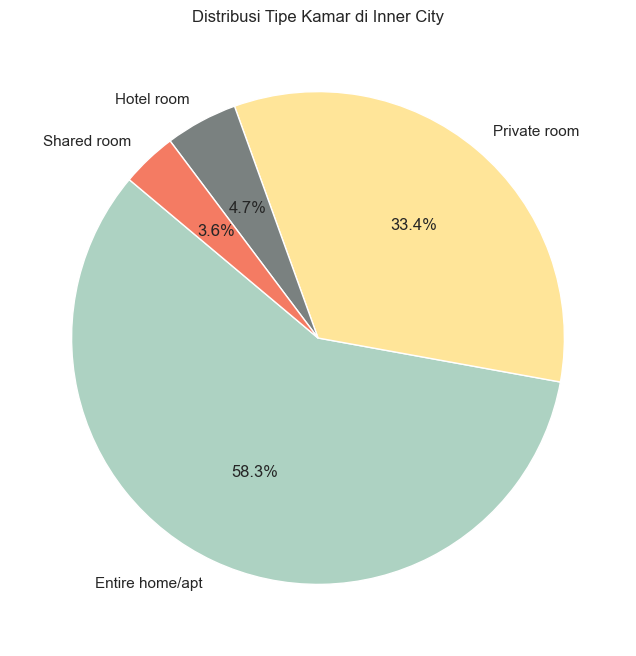

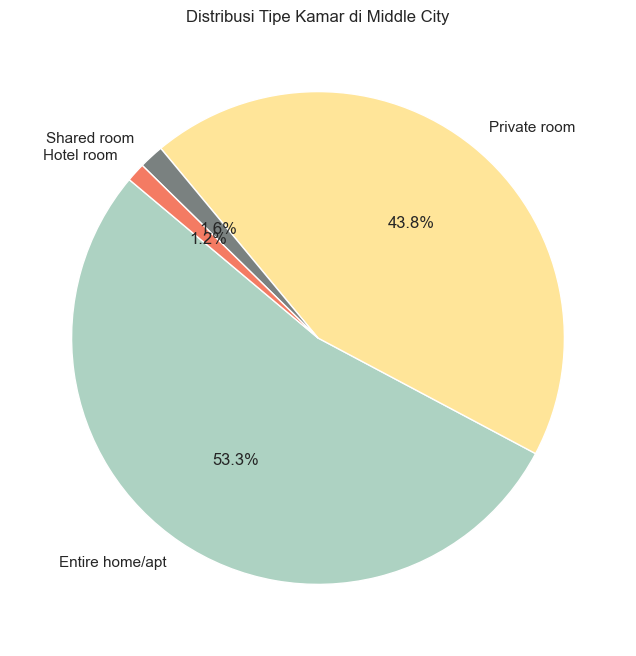

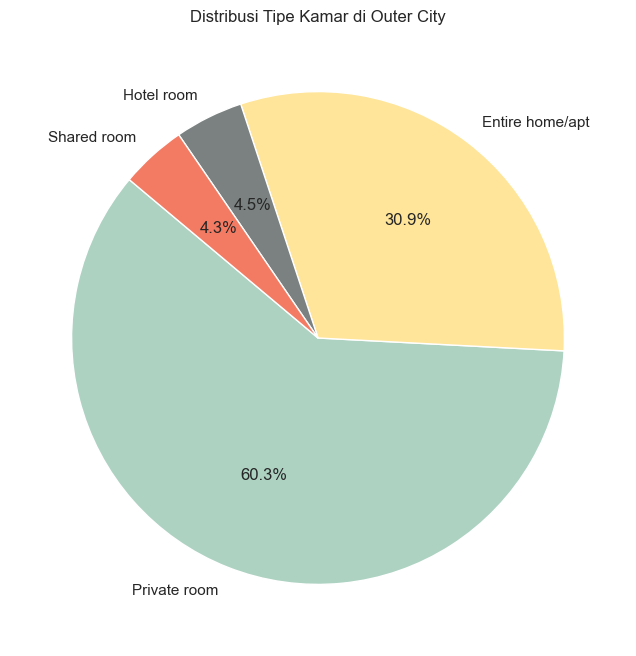

In [31]:
# visualisasi data
cities = type['Label City'].unique()
colors = ['#add2c2', '#ffe599', '#7a8180', '#f47b63']

# Looping untuk masing-masing zona
for city in cities:
    
    # Filter data untuk label kota tertentu
    city_data = type[type['Label City'] == city]

    # Data untuk pie chart
    labels = city_data['room_type']
    sizes = city_data['count']

    # Plot pie chart
    plt.figure(figsize=(8,8))
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140,colors=colors)
    plt.title(f'Distribusi Tipe Kamar di {city}')
    plt.show()

In [32]:
# Jumlah tipe kamar berdasarkan district
jumlah = airbnb.groupby(['room_type','neighbourhood','Label City']).size().reset_index(name='count')

# mencari jumlah tipe kamar tertinggi dan menampilkan districtnya
result = jumlah.sort_values(by='count',ascending=False).groupby('room_type').head(1)
result

,room_type,neighbourhood,Label City,count
22,Entire home/apt,Khlong Toei,Inner City,1520
128,Private room,Vadhana,Inner City,542
155,Shared room,Phra Nakhon,Inner City,131
79,Hotel room,Vadhana,Inner City,105


/var/folders/br/0jlf4jln3ygb5_nrs1tc4gsm0000gn/T/ipykernel_32255/683472337.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='room_type', y='count', hue='neighbourhood', data=result, palette='viridis', ci=None)


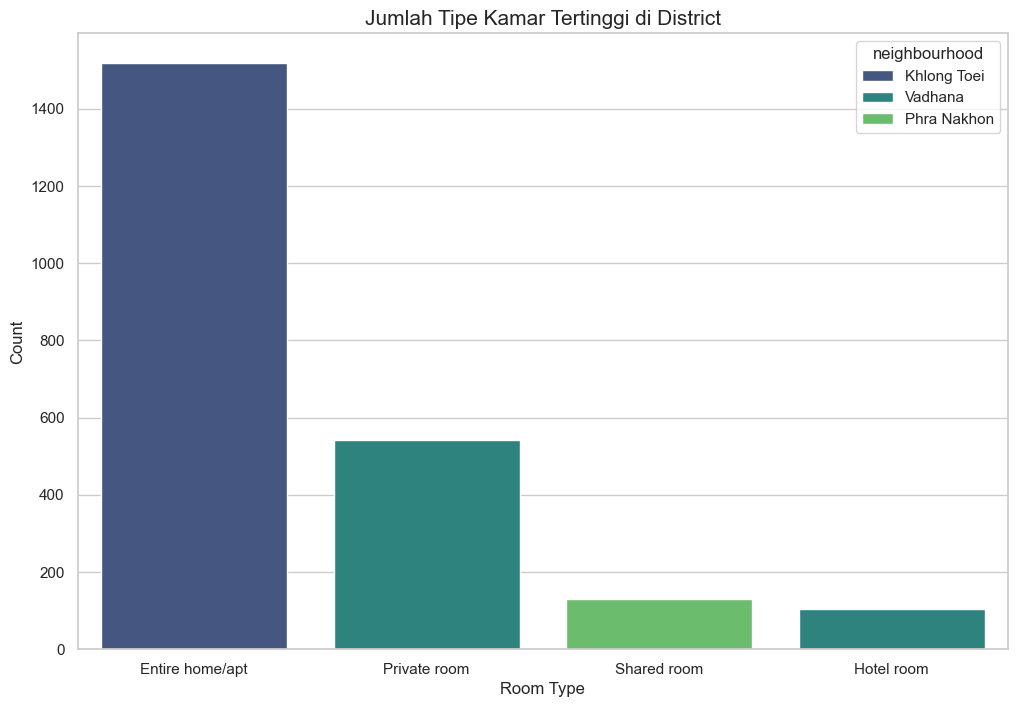

In [33]:
# visualisasi data 
plt.figure(figsize=(12, 8))
sns.barplot(x='room_type', y='count', hue='neighbourhood', data=result, palette='viridis', ci=None)
plt.title('Jumlah Tipe Kamar Tertinggi di District',size=15)
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.show()

In [32]:
district = airbnb.groupby(['neighbourhood', 'Label City'])[['name', 'room_type']].count().sort_values(by='name').reset_index()

# 5 district tertinggi berdasarkan zona
top_5_by_city = district.groupby('Label City').apply(lambda group: group.nsmallest(5, 'name')).reset_index(drop=True)

# Menampilkan room type nya
top5_city = airbnb.groupby(['neighbourhood', 'Label City', 'room_type'])[['name']].count().reset_index()
top5_city = pd.merge(top_5_by_city, top5_city, on=['neighbourhood', 'Label City'])

# Ganti nama kolom
top5_city = top5_city.rename(columns={'name_y': 'count', 'room_type_y': 'room_type'})

# Hapus kolom name_x dan room_type_x
top5_city = top5_city.drop(['name_x', 'room_type_x'], axis=1)


# Tampilkan hasil
display(top5_city)

,neighbourhood,Label City,room_type,count
0,Bangkok Yai,Inner City,Entire home/apt,41
1,Bangkok Yai,Inner City,Hotel room,3
2,Bangkok Yai,Inner City,Private room,43
3,Bangkok Yai,Inner City,Shared room,3
4,Dusit,Inner City,Entire home/apt,12
5,Dusit,Inner City,Private room,71
6,Dusit,Inner City,Shared room,8
7,Samphanthawong,Inner City,Entire home/apt,45
8,Samphanthawong,Inner City,Hotel room,9
9,Samphanthawong,Inner City,Private room,47


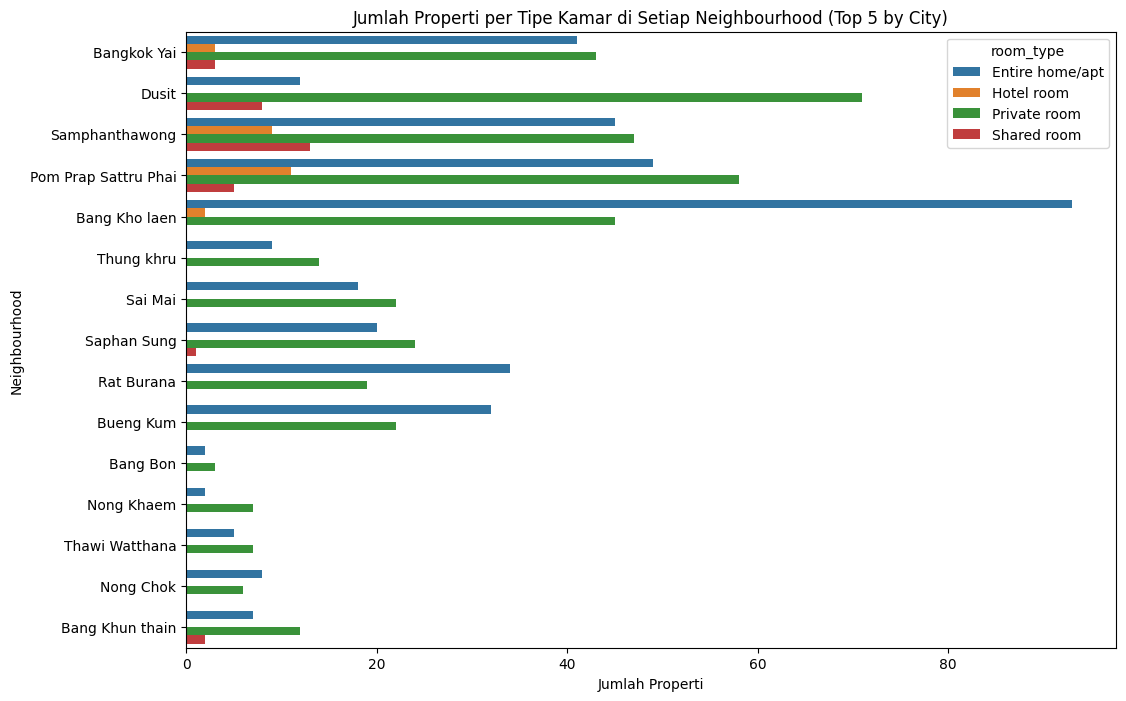

In [33]:
# visualisasi
plt.figure(figsize=(12, 8))
sns.barplot(x='count', y='neighbourhood', hue='room_type', data=top5_city)
plt.title('Jumlah Properti per Tipe Kamar di Setiap Neighbourhood (Top 5 by City)')
plt.xlabel('Jumlah Properti')
plt.ylabel('Neighbourhood')
plt.show()

**INSIGHT**
- Tipe kamar yang paling banyak adalah tipe kamar Entire Home/apartement hampir berjumlah 9000 pilihan tipe kamar ini, sedangkan untuk tipe private room juga dikatakan cukup banyak yaitu hampir 5800 pilihan untuk tipe kamar ini.

- Jika berdasarkan Label city :
    - Inner city : Dari 12300 properti yang ada di bagian ini, terdapat 7000 properti atau sekitar 58% dengan tipe kamar Entire home/apartement
    - Middle City : Dari 2900 properti yang ada di bagian ini, 53% dari total properti merupakan tipe kamar Entire home/apartement
    - Outer City : Dari 647 properti yang ada di bagian ini, 60 % dari total properti merupakan tipe kamar private room

- District yang memiliki Jumlah masing-masing tipe kamar tertinggi:
    - Entire home/Apartement : Khlong Toei
    - Private Room : Vandhana
    - Shared Room : Phra Nakhon
    - Hotel Room : Vadhana

- Karakteristik setiap tipe kamar :
    -  **Entire home/apartemen** menjadi tipe kamar yang paling banyak disewakan oleh host. Pada tipe ini fasilitas yang disediakan sama seperti rumah. Fasilitas yang disediakan biasanya kamar tidur, kamar mandi, dapur, dan pintu masuk yang khusus. 

    - **Private room** juga menjadi tipe kamar yang banyak disewakan oleh host. pada tipe ini merujuk pada ruangan pribadi seperti hostel, guesthouse dan sebagainya. fasilitasnya hanya kamar tidur dan kamar mandi, untuk ruang lainnya yaitu penyewa akan bersama dengan pemilik properti.  

    - **Hotel room**  menjadi tipe kamar yang jumlah nya sedikit untuk di daftarkan di airbnb. secara fasilitas, hotel memiliki fasilitas yang lebih lengkap dibandingkan dengan private room. Selain itu, hotel memiliki tempat yang lebih privasi karena semua fasilitas tidak digunakan secara bersama kecuali playground, kolam renang dan sebagainya.

    - **Shared room** menjadi tipe kamar terendah. tipe ini tidak memiliki ruang privasi karena semua fasilitas digunakan secara bersama dengan penyewa lainnya. seperti kamar mandi, penyewa ini akan tidur di ruang yang sama dengan orang lain biasanya hanya pembatas tipis sebagai pembatasnya.

- Berdasarkan dari jumlah persebaran tipe kamar dari 5 district dengan jumlah listing terendah, didapatkan bahwa paling banyak tipe yang disewakan oleh para listing di adalah private room dan entire home/apt sedangkan ada beberapa district di semua zona yang tidak memiliki semua tipe kamar, hal ini bisa menjadi sebuah peluang untuk mengajak calon host yang memiliki properti tersebut dapat bergabung dengan airbnb.

**KESIMPULAN**

Didapatkan Tipe kamar yang paling banyak adalah Entire Home/apt dan private room, Kedua tipe ini memiliki proporsi yang sangat tinggi di setiap zonanya. Fasilitas yang diberikan oleh kedua tipe ini cukup berbeda, jika entire home memiliki fasilitas yang seperti rumah sedangkan untuk private room hanya menyediakan kamar seperti hostel atau guesthouse. Jika dilihat berdasarkan districtnya, ternyata tidak semua district memiliki semua tipe kamar. Terutama pada zona inner dan middle yang bisa menjadi sebuah peluang untuk memperluas bisnis airbnb dengan menyediakan semua tipe kamar yang tersedia. Jumlah tipe kamar yang tersedia paling banyak mendominasi di daerah inner city seperti Khlong Toei, Vandhana, dan Phra Nakhon.

### **3. ANALISIS HARGA**

Analisis ini akan memberikan informasi, faktor apa yang mempengaruhi harga sewa yang di berikan oleh host kepada pelanggan.

Pertanyaan :
1. Bagaimana rata-rata harga di masing-masing tipe kamar?
2. Bagaimana rata-rata harga di setiap bagian kota bangkok?
3. Apakah review dapat mempengaruhi harga sewa properti?

In [34]:
# rata-rata harga di setiap zona
harga_label = airbnb.groupby(['Label City'])[['price']].median()
harga_label

,price
Label City,
Inner City,1507.0
Middle City,999.0
Outer City,926.0


/var/folders/br/0jlf4jln3ygb5_nrs1tc4gsm0000gn/T/ipykernel_33392/3255676151.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x='price', y=harga_label.index, data=harga_label.reset_index(), palette='viridis')


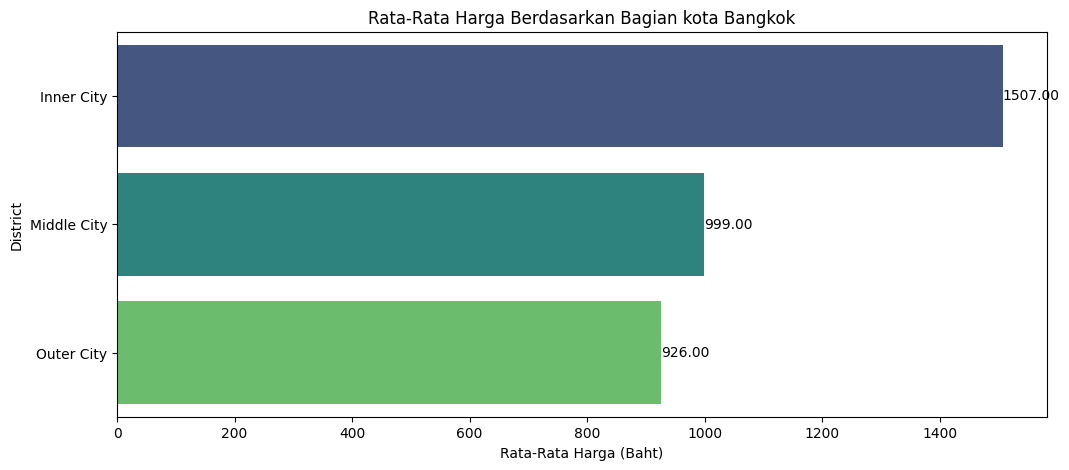

In [35]:
# visualisasi
plt.figure(figsize=(12,5))
bar_plot = sns.barplot(x='price', y=harga_label.index, data=harga_label.reset_index(), palette='viridis')

for index, value in enumerate(harga_label['price']):
    bar_plot.text(value, index, f'{value:.2f}', ha='left', va='center', color='black', fontsize=10)

plt.title('Rata-Rata Harga Berdasarkan Bagian kota Bangkok')
plt.xlabel('Rata-Rata Harga (Baht)')
plt.ylabel('District')
plt.show()

In [36]:
# rata-rata harga berdasarkan district
harga = airbnb.groupby(['neighbourhood','Label City'])[['price']].median().sort_values(by='price',ascending=False)
harga

,,price
neighbourhood,Label City,
Nong Chok,Outer City,2539.0
Parthum Wan,Inner City,2400.0
Vadhana,Inner City,2000.0
Samphanthawong,Inner City,2000.0
Bang Rak,Inner City,1850.0
Pom Prap Sattru Phai,Inner City,1709.0
Khlong Toei,Inner City,1700.0
Ratchathewi,Inner City,1536.0
Taling Chan,Outer City,1502.5


/var/folders/br/0jlf4jln3ygb5_nrs1tc4gsm0000gn/T/ipykernel_33392/607212937.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x='price', y='neighbourhood', data=harga.reset_index(), palette='viridis')


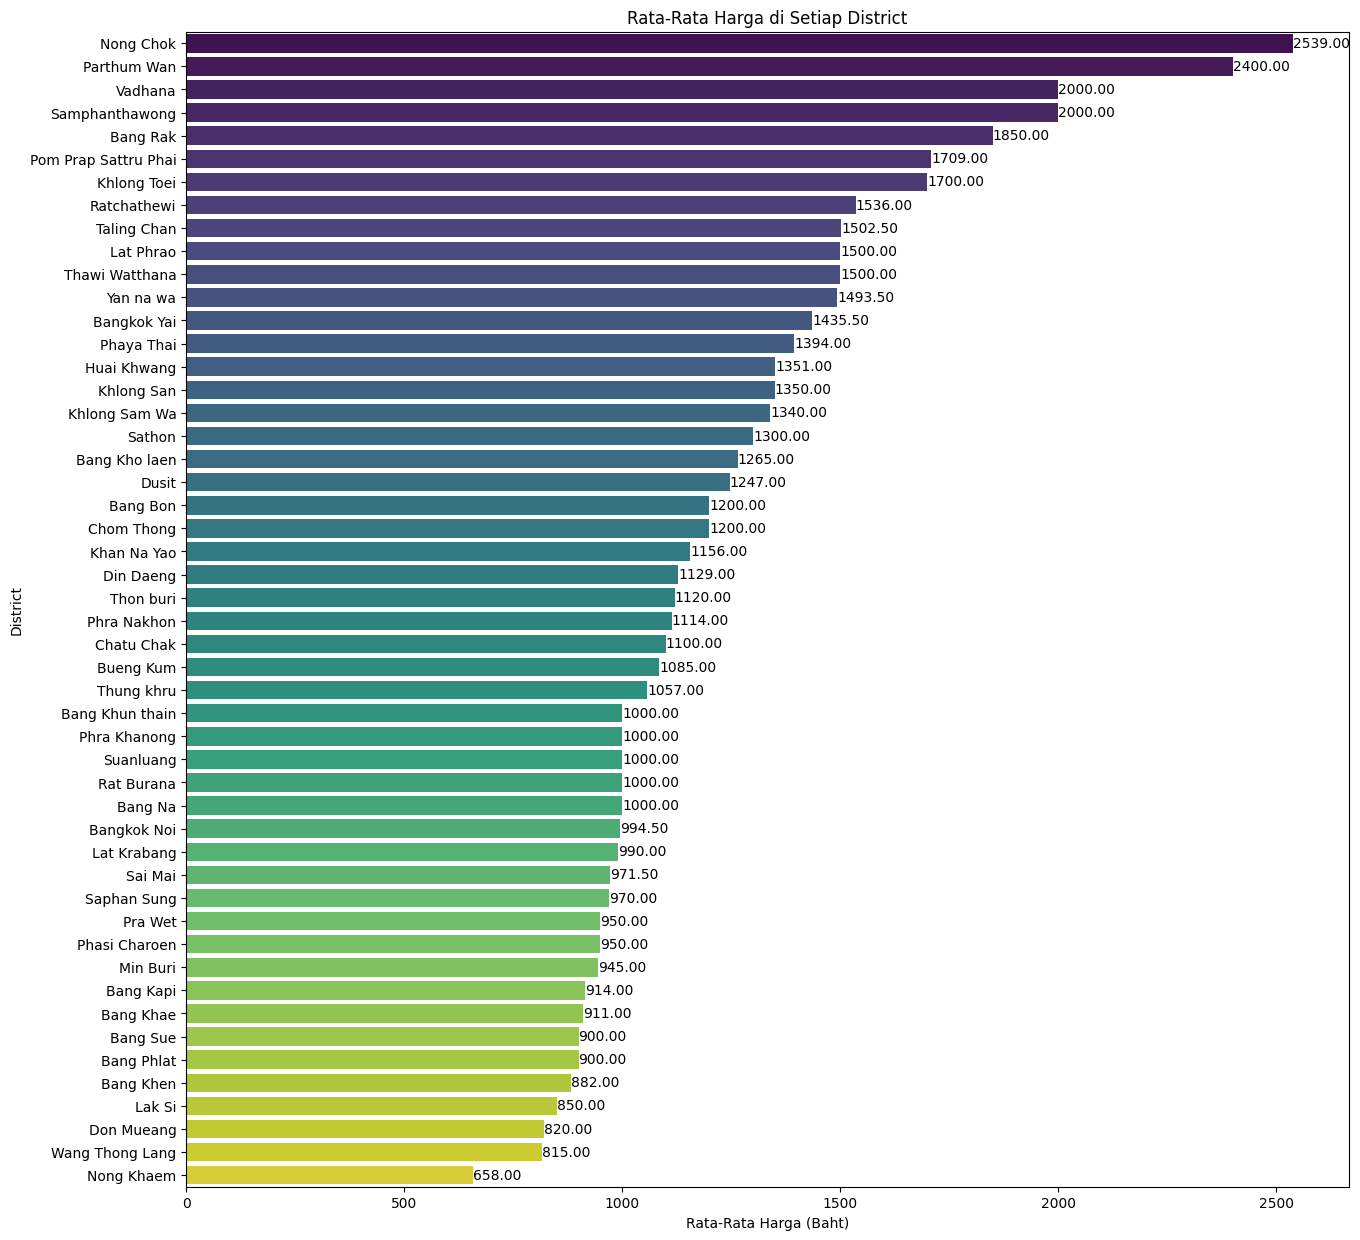

In [37]:
# visualisasi
plt.figure(figsize=(15,15))
bar_plot = sns.barplot(x='price', y='neighbourhood', data=harga.reset_index(), palette='viridis')

for index, value in enumerate(harga['price']):
    bar_plot.text(value, index, f'{value:.2f}', ha='left', va='center', color='black', fontsize=10)

plt.title('Rata-Rata Harga di Setiap District')
plt.xlabel('Rata-Rata Harga (Baht)')
plt.ylabel('District')
plt.show()

In [39]:
# harga berdasarkan tipe kamar
price_room = airbnb.groupby('room_type')[['price']].median().sort_values(by='price',ascending=False).reset_index()
price_room

,room_type,price
0,Hotel room,1700.0
1,Entire home/apt,1536.0
2,Private room,1213.5
3,Shared room,500.0


In [40]:
# harga berdasarkan tipe kamar di setiap zona
label = airbnb.groupby(['Label City','room_type'])[['price']].median()
label

price
Label City  room_type              
Inner City  Entire home/apt  1659.0
            Hotel room       1781.0
            Private room     1400.0
            Shared room       500.0
Middle City Entire home/apt  1000.0
            Hotel room       1363.0
            Private room      960.0
            Shared room       500.0
Outer City  Entire home/apt  1352.0
            Hotel room        990.0
            Private room      850.0
            Shared room       390.0

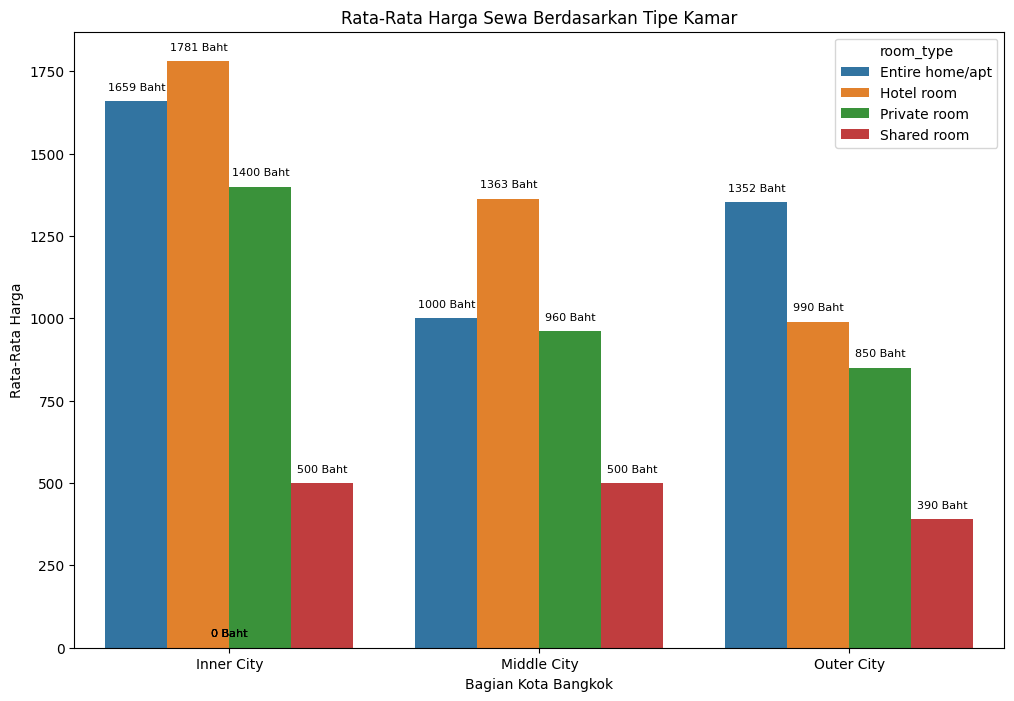

In [41]:
# visualisasi
plt.figure(figsize=(12, 8))
sns.barplot(x='Label City', y='price', hue='room_type', data=label.reset_index())

# label
for p in plt.gca().patches:
    price_label = f"{int(p.get_height())} Baht"
    plt.gca().annotate(price_label, (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=8, color='black')

plt.title('Rata-Rata Harga Sewa Berdasarkan Tipe Kamar')
plt.xlabel('Bagian Kota Bangkok')
plt.ylabel('Rata-Rata Harga')
plt.show()

In [42]:
# group by harga dan district
district_price = airbnb.groupby(['neighbourhood', 'room_type', 'Label City']).agg({'price': 'median', 'neighbourhood': 'count'}).rename(columns={'neighbourhood': 'property_count'}).reset_index()

# mengurutkan harga 
sorted_district_price= district_price.sort_values(by=['room_type', 'price'], ascending=[False, False])

# mengambil tipe kamar tertinggi dan terendah berada di district apa
top_by_room_type = sorted_district_price.groupby('room_type')
display(top_by_room_type.head(1))
display(top_by_room_type.tail(1))

,neighbourhood,room_type,Label City,price,property_count
18,Bang Khun thain,Shared room,Outer City,7276.0,2
97,Parthum Wan,Private room,Inner City,2000.0,140
165,Yan na wa,Hotel room,Inner City,7943.0,8
85,Lat Phrao,Entire home/apt,Middle City,3900.0,26


,neighbourhood,room_type,Label City,price,property_count
137,Saphan Sung,Shared room,Middle City,313.0,1
94,Nong Khaem,Private room,Outer City,501.0,7
3,Bang Kapi,Hotel room,Middle City,600.0,1
161,Wang Thong Lang,Entire home/apt,Middle City,800.0,33


/var/folders/br/0jlf4jln3ygb5_nrs1tc4gsm0000gn/T/ipykernel_33392/2018554018.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x='price', y='room_type', data=price, palette='viridis')


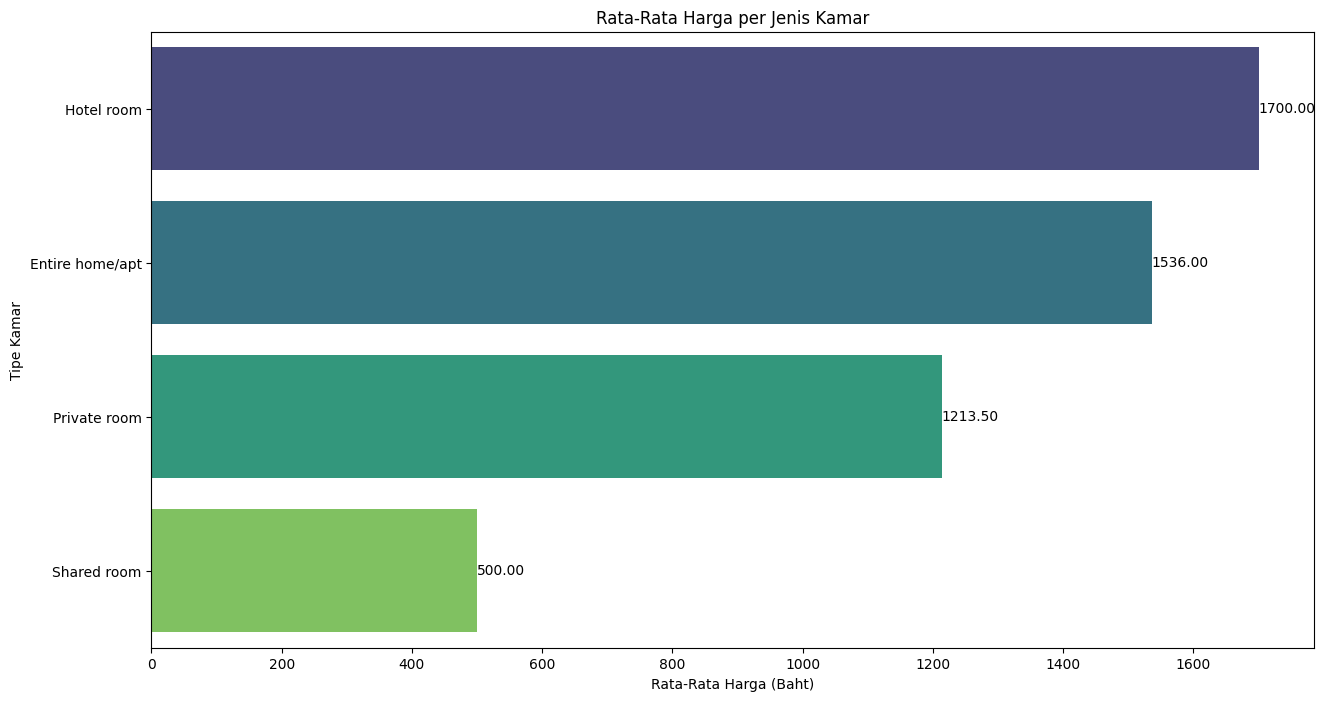

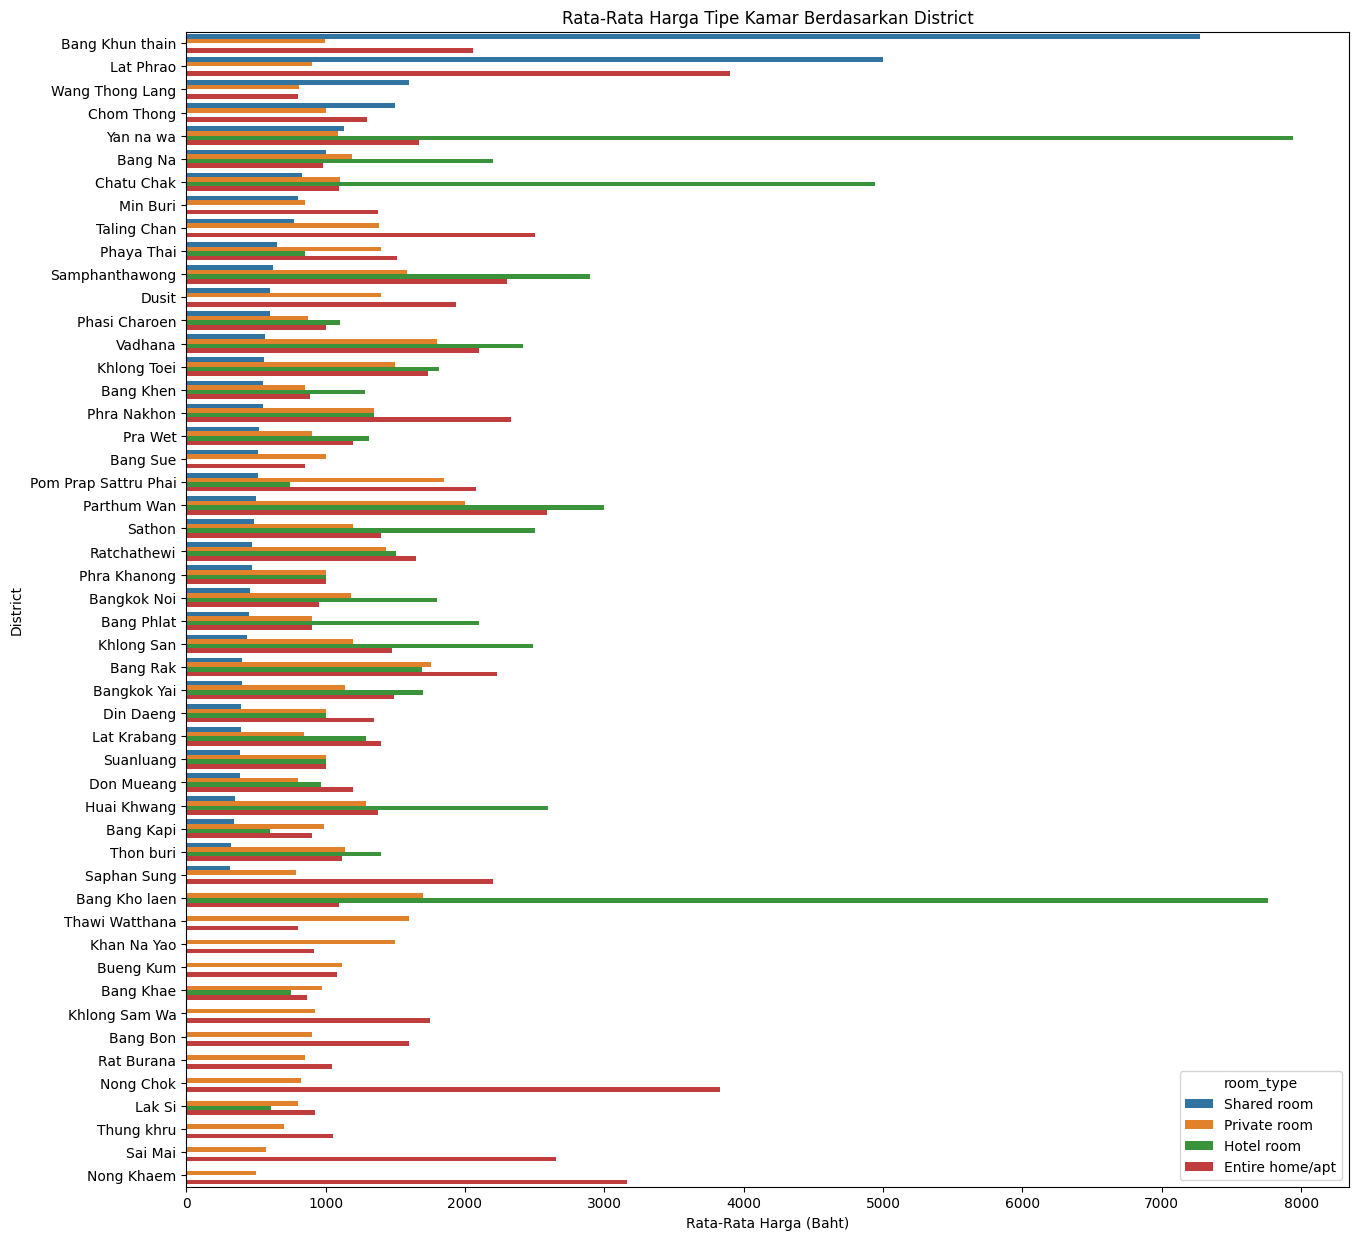

In [43]:
# visualisasi data rata-rata harga per jenis kamar
plt.figure(figsize=(15,8))
bar_plot = sns.barplot(x='price', y='room_type', data=price, palette='viridis')

# label
for index, value in enumerate(price['price']):
    bar_plot.text(value, index, f'{value:.2f}', ha='left', va='center', color='black', fontsize=10)

plt.title('Rata-Rata Harga per Jenis Kamar')
plt.xlabel('Rata-Rata Harga (Baht)')
plt.ylabel('Tipe Kamar')
plt.show()


# visualisasi data rata-rata harga per jeniis kamar berdasarkan district nya
plt.figure(figsize=(15, 15))
sns.barplot(x='price', y='neighbourhood', hue='room_type', data=sorted_district_price, estimator=np.median)
plt.title('Rata-Rata Harga Tipe Kamar Berdasarkan District')
plt.xlabel('Rata-Rata Harga (Baht)')
plt.ylabel('District')
plt.show()

In [50]:
data = airbnb[['neighbourhood', 'Label City', 'room_type', 'price']]

# Menghitung rata-rata harga per tipe kamar untuk setiap neighbourhood
average_prices = data.groupby(['neighbourhood', 'Label City', 'room_type'])[['price']].median().reset_index()

# Gabungkan informasi rata-rata harga dengan DataFrame top5_city
top_5 = pd.merge(top5_city, average_prices,
                                         on=['neighbourhood', 'Label City', 'room_type'])

# Tampilkan hasil
display(top_5)

,neighbourhood,Label City,room_type,count,price
0,Bangkok Yai,Inner City,Entire home/apt,41,1490.0
1,Bangkok Yai,Inner City,Hotel room,3,1700.0
2,Bangkok Yai,Inner City,Private room,43,1143.0
3,Bangkok Yai,Inner City,Shared room,3,400.0
4,Dusit,Inner City,Entire home/apt,12,1939.5
5,Dusit,Inner City,Private room,71,1400.0
6,Dusit,Inner City,Shared room,8,600.0
7,Samphanthawong,Inner City,Entire home/apt,45,2300.0
8,Samphanthawong,Inner City,Hotel room,9,2900.0
9,Samphanthawong,Inner City,Private room,47,1586.0


In [51]:
from scipy.stats import f_oneway
# Uji ANOVA untuk 'tipe_kamar'
anova_tipe_kamar, p_value_tipe_kamar = f_oneway(*[airbnb['price'][airbnb['room_type'] == tipe] for tipe in airbnb['room_type'].unique()])

# Uji ANOVA untuk 'label_city'
anova_label_city, p_value_label_city = f_oneway(*[airbnb['price'][airbnb['neighbourhood'] == city] for city in airbnb['neighbourhood'].unique()])

# Tampilkan hasil
print(f'Uji ANOVA untuk tipe_kamar: p-value = {p_value_tipe_kamar}')
print(f'Uji ANOVA untuk label_city: p-value = {p_value_label_city}')

Uji ANOVA untuk tipe_kamar: p-value = 0.13557456901150586
Uji ANOVA untuk label_city: p-value = 0.8548195803160268


**INSIGHT**

Berdasarkan Grafik diatas :
- Dapat diketahui bahwa rata-rata harga sewa di Bangkok berkisar **antara 658 - 2.539 Baht**
- rata-rata harga sewa paling tinggi berdasarkan bagian kota adalah bagian **Inner city yaitu 1507 Baht**
- Middle City dan Outer City memiliki rata-rata harga sewa yang tidak terlalu jauh dengan harga rata-rata diatas 920 baht 
- Jika berdasarkan districtnya **Nong Chock memiliki rata-rata harga sewa paling tinggi yaitu 2.539 Baht**
- rata-rata harga sewa berdasarkan tipe kamar :
    - tipe kamar hotel yaitu 1700 Baht, dengan kisaran harga yaitu 600-8000 Baht
    - tipe kamar Entire Home/apt 1536 Baht, dengan kisaran harga yaitu 800-3900 Baht
    - tipe kamar Private room 1213.5 Baht, dengan kisaran harga yaitu 500-2000 Baht
    - tipe kamar shared room 500 Baht, dengan kisaran harga yaitu 310-7300 Baht
- rata-rata harga sewa berdasarkan tipe kamar di setiap bagian kota Bangkok:
    - Inner City
        - Entire Home/apt : 1659 Baht
        - Hotel : 1781 Baht
        - Private Room : 1400 Baht
        - Shared Room : 500 Baht

    - Middle City
        - Entire Home/apt : 1000 Baht
        - Hotel : 1363 Baht
        - Private Room : 960 Baht
        - Shared Room : 500 Baht

    - Outer City
        - Entire Home/apt : 1352 Baht
        - Hotel : 990 Baht
        - Private Room : 850 Baht
        - Shared Room : 390 Baht
- Rata-rata Harga sewa tipe kamar jika berdasarkan district :
    - tipe kamar hotel tertinggi terjadi di district Ya Na Wa yaitu 7943 Baht. Pada district ini memiliki 8 pilihan untuk tipe kamar ini
    - tipe kamar Entire home/apt tertinggi terjadi di district Lat Phrao yaitu 3900 Baht. Pada district ini memiliki 26 pilihan untuk tipe kamar ini
    - tipe kamar Shared room tertinggi terjadi di district Bang Khun Thain yaitu 7276 Baht. pada district ini memiliki 2 pilihan untuk tipe kamar ini
    - tipe kamar private room tertinggi terjadi di district Parthum Wan yaitu 2000 Baht. Pada district ini memiliki 140 pilihan untuk tipe kamar ini

- Setelah dilakukan uji Anova apakah tipe kamar dan zona apakah terdapat perbedaan harga atau tidak, didapatkan bahwa nilai p_value dari keduanya lebih dari 0.05 sehingga dapat dikatakan bahwa tipe kamar dan zona kurang memberikan perbedaan harga dari segi statistiknya 

**KESIMPULAN**

rata-rata Harga sewa di kota Bangkok berkisar antara 658-2539 Baht, Inner city merupakan zona yang memiliki rata-rata harga sewa paling tinggi yaitu 1507 Baht. Masing-masing tipe kamar disetiap zona Bangkok memiliki kisaratan harga yang bervariariatif, jika di Inner City dan Outer City tipe kamar paling tinggi adalah Entire Home/apt, sedangkan untuk zona Middle paling tinggi adalah tipe kamar Hotel. Jika dilihat berdasarkan harga, Zona dan tipe kamar kurang memberikan perbedaan harga sewa di masing-masing tipe kamarnya.

# **KESIMPULAN**

Berdasarkan grafik di atas, dapat disimpulkan bahwa:

- Airbnb memiliki 78% listing terdapat di zona Inner City, dimana zona ini merupakan pusat kota Bangkok yang memiliki berbagai macam tempat hiburan sehingga menjadi daya tarik bagi para wisatawan seperti pusat perbelanjaan, kuliner, terminal bus terbesar di kota bangkok dan sebagainya. Selain itu, di district ini memiliki transportasi umum yang mudah dijangkau oleh para wisatawan, seperti taksi, bus, MRT, kendaraan pribadi dan sebagainya. Sedangkan, listing terendah terjadi di zona Outer city yaitu zona yang cukup jauh dari pusat kota, Zona ini memberikan suasana ketenangan yang tidak didapatkan di pusat kota dan memiliki ruang terbuka yang luas. Zona ini cukup sulit dijangkau oleh kendaraan umum, biasanya hanya terdapat bus umum yang tidak menjangkau semua district dan mobil pribadi. Dari segi persebaran berdasarkan district nya, zona Inner dan middle city belum tersebar dengan baik karena masih terdapat district yang memiliki jumlah properti sedikit dibandingkan district lainnya, padahal ini merupakan zona yang memiliki peluang besar untuk mengembangkan bisnis.

- Didapatkan Tipe kamar yang paling banyak adalah Entire Home/apt dan private room, Kedua tipe ini memiliki proporsi yang sangat tinggi di setiap zonanya. Fasilitas yang diberikan oleh kedua tipe ini cukup berbeda, jika entire home memiliki fasilitas yang seperti rumah sedangkan untuk private room hanya menyediakan kamar seperti hostel atau guesthouse. 

- Jika dilihat berdasarkan districtnya, ternyata tidak semua district memiliki semua tipe kamar. Terutama pada zona inner dan middle yang bisa menjadi sebuah peluang untuk memperluas bisnis airbnb dengan menyediakan semua tipe kamar yang tersedia. Jumlah tipe kamar yang tersedia paling banyak mendominasi di daerah inner city seperti Khlong Toei, Vandhana, dan Phra Nakhon.

- rata-rata Harga sewa di kota Bangkok berkisar antara 658-2539 Baht, Inner city merupakan zona yang memiliki rata-rata harga sewa paling tinggi yaitu 1507 Baht. Masing-masing tipe kamar disetiap zona Bangkok memiliki kisaratan harga yang bervariariatif, jika di Inner City dan Outer City tipe kamar paling tinggi adalah Entire Home/apt, sedangkan untuk zona Middle paling tinggi adalah tipe kamar Hotel. 

- Jika dilihat berdasarkan harga, Zona dan tipe kamar kurang memberikan perbedaan harga sewa di masing-masing tipe kamarnya.

# **REKOMENDASI**

- **Perluasan Bisnis di Zona Inner dan Middle City:**

Zona inner dan middle city memiliki potensi besar untuk pertumbuhan bisnis airbnb, disarankan untuk memperluas jumlah listing melalui district yang persebaran properti nya masih sedikit. Walaupun zona Outer memiliki jumlah listing terendah diantara zona lainnya, tetapi zona ini memiliki potensi untuk mengembangkan bisnis airbnb ini melalui karakteristik yang tidak di temukan di inner dan outer city.

- **Variasi Tipe Kamar:**

Entire Home/apt dan private room menjadi tipe yang paling banyak diantara tipe lainnya, tetapi ada peluang untuk menarik lebih banyak pelanggan dengan variasi kamar yang disediakan yaitu hotel dan shared room. Hal ini dilakukan untuk memberikan referensi kepada user terhadap pilihan properti yang ingin disewa, untuk kedua tipe tersebut cukup jarang ditemukan di beberapa district seperti di district yang memiliki jumlah properti terendah.

- **Harga Sewa Untuk District Dengan Jumlah terendah:**
Terapkan strategi harga yang cerdas untuk meningkatkan daya saing. Referensi harga sewa ini berdasarkan rata-rata dari harga dengan mempertimbangkan zona, district dan tipe kamar yang ada. Harga ini dapat menjadi referensi bagi para calon listing untuk menyewakan properti nya melalui airbnb terkhusus untuk district dengan jumlah properti terendah
    - Referensi Rata-rata Harga :
        - **Inner**
            - Tipe Hotel : 700 - 7800
            - Tipe Entire Home/Apartement : 1000 - 2100
            - Tipe Private : 1100 - 1900
            - Tipe Shared : 400 - 650
        - **Middle**
            - Tipe Hotel : 900 - 2700
            - Tipe Entire Home/Apartement : 900 - 1400
            - Tipe Private : 500 - 1200
            - Tipe Shared Room : 300 - 500
        - **Outer**
            - Tipe Hotel : 800 - 3900
            - Tipe Entire Home/Apartement : 900 - 1000
            - Tipe Private : 500 - 1600
            - Tipe Shared : 900 - 7300

# **TABLEAU**

Anda dapat mengakses Dashboard melalui link :

https://public.tableau.com/app/profile/annisa5871/viz/Capsote2_AirbnbListingBangkokAnalysis/AIRBNBLISTINGBANGKOKANALYSIS?publish=yes#WelcomeQuestionnaire